In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from astropy.table import QTable
from astropy import units as u

from cluster import Cluster

In [2]:
mcxccls=pd.read_csv('data/mcxc|.txt', header=3, sep='|', skiprows=[4],on_bad_lines='warn', skipfooter=1)
mcxccls

/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_12699/1250100080.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  mcxccls=pd.read_csv('data/mcxc|.txt', header=3, sep='|', skiprows=[4],on_bad_lines='warn', skipfooter=1)


,MCXC,OName,AName,Ah Am RAs Ed Em Es,RAdeg DEdeg,GLON GLAT,z,Cat,Sub-Cat,Scale,...,R500,Notes,Cat1,Cat2,Cat3,Cat4,500r1,500r2,500r3,500r4
0,J0000.1+0816,RXC J0000.1+0816,UGC 12890 ...,0 0 7.1 + 8 16 28,0.030 8.274,101.783 -52.477,0.0396,NORAS/REFLEX,NORAS,0.784,...,0.6296,,BCS,,,,1.084,,,NaN
1,J0000.4-0237,RXC J0000.4-0237,...,0 0 24.7 - 2 37 30,0.103 -2.625,94.268 -62.622,0.0379,SGP,SGP,0.752,...,0.4817,,,,,,,,,NaN
2,J0001.6-1540,RXC J0001.6-1540,...,0 1 39.0 -15 40 52,0.412 -15.681,75.129 -73.733,0.1246,SGP,SGP,2.234,...,0.8021,,,,,,,,,NaN
3,J0001.9+1204,RXC J0001.9+1204,A2692 ...,0 1 57.0 +12 4 23,0.488 12.073,104.308 -49.001,0.2033,NORAS/REFLEX,NORAS,3.342,...,0.9178,,,,,,,,,NaN
4,J0003.1-0605,RXCJ0003.1-0605,A2697 ...,0 3 11.8 - 6 5 10,0.799 -6.086,92.169 -66.033,0.2320,NORAS/REFLEX,REFLEX,3.698,...,1.1326,,SGP,,,,0.952,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,J2357.0-3445,RXCJ2357.0-3445,A4059 ...,23 57 2.3 -34 45 38,359.260 -34.761,356.359 -76.082,0.0475,NORAS/REFLEX,REFLEX,0.931,...,0.9640,L,EMSS_1994,SGP,,,0.132,0.952,,NaN
1739,J2359.3-6042,RXCJ2359.3-6042,A4067 ...,23 59 19.2 -60 42 0,359.830 -60.700,314.102 -55.284,0.0989,NORAS/REFLEX,REFLEX,1.826,...,0.8572,,,,,,,,,NaN
1740,J2359.4-3418,MS2356.9-3434,...,23 59 27.3 -34 18 22,359.864 -34.306,357.005 -76.739,0.1150,EMSS,EMSS_1994,2.085,...,0.6198,,,,,,,,,NaN
1741,J2359.5-3211,RX J2359.5-3211,BSe RXJ2359.5-3211 ...,23 59 36.0 -32 11 6,359.900 -32.185,5.630 -77.667,0.4780,SHARC,SHARC_SOUTH,5.957,...,0.6776,,,,,,,,,NaN


In [3]:
mcxccls.columns=mcxccls.columns.str.strip()
mcxccls.columns.tolist()

['MCXC',
 'OName',
 'AName',
 'Ah Am  RAs  Ed Em Es',
 'RAdeg   DEdeg',
 'GLON    GLAT',
 'z',
 'Cat',
 'Sub-Cat',
 'Scale',
 'L500',
 'M500',
 'R500',
 'Notes',
 'Cat1',
 'Cat2',
 'Cat3',
 'Cat4',
 '500r1',
 '500r2',
 '500r3',
 '500r4']

In [4]:
mcxccls['M500']

0       0.7373
1       0.3297
2       1.6557
3       2.6927
4       5.2188
         ...  
1738    2.6658
1739    1.9699
1740    0.7568
1741    1.4784
1742    2.1579
Name: M500, Length: 1743, dtype: float64

In [5]:
cls_data={'M500':mcxccls['M500'],
          'L500':mcxccls['L500'],
          'R500':mcxccls['R500']
         }
units={
    'M500': 1e14*u.Msun,
    'L500': 1e37*u.W,
    'R500':u.Mpc
}

In [6]:
cls_table=QTable(cls_data, units=units)

In [7]:
cls_table

M500,L500,R500
1e+14 solMass,1e+37 W,Mpc
float64,float64,float64
0.7373,0.19628,0.6296
0.3297,0.052338,0.4817
1.6557,0.814902,0.8021
2.6927,1.990205,0.9178
5.2188,6.107094,1.1326
1.2016,0.441862,0.7388
...,...,...
2.1719,1.307553,0.871


In [8]:
i=1
test_cluster=Cluster(cls_table['R500'][i], cls_table['M500'][i], L500=cls_table['L500'][i], m500=cls_table['M500'][i])

In [9]:
test_cluster.mass

<Quantity 3.677527e+70 GeV>

In [10]:
test_cluster.baryon_temp

<Quantity 9.23082525e-07 GeV>

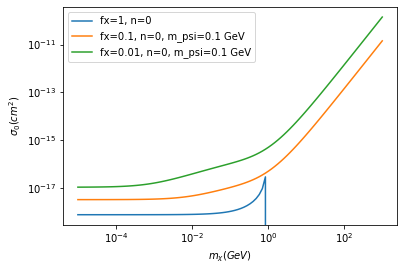

In [11]:
test_cluster.plot_sigma0_vs_m_chi(f_chi=[1, 0.1, 0.01])

In [14]:
cls_table['M500'].min(), cls_table['M500'].max()

(<Quantity 0.0096 1e+14 solMass>, <Quantity 22.1 1e+14 solMass>)

In [15]:
cls_table['L500'].min(), cls_table['L500'].max()

(<Quantity 0.000153 1e+37 W>, <Quantity 37.304424 1e+37 W>)

In [16]:
from cluster import temp_from_luminosity
temp_from_luminosity(cls_table['L500'].min()), temp_from_luminosity(cls_table['L500'].max())

(<Quantity 1.21712666e-07 GeV>, <Quantity 9.03328708e-06 GeV>)

In [21]:
temp_from_luminosity(cls_table['L500'].min()).to(u.K, equivalencies=u.temperature_energy()),temp_from_luminosity(cls_table['L500'].max()).to(u.K, equivalencies=u.temperature_energy())


(<Quantity 1412416.83704192 K>, <Quantity 1.04826944e+08 K>)

In [22]:
cls_table['R500'].min(), cls_table['R500'].max()

(<Quantity 0.1497 Mpc>, <Quantity 1.69 Mpc>)